In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_5712\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [6]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [7]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [8]:
df.shape

(994879, 4)

In [9]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [10]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

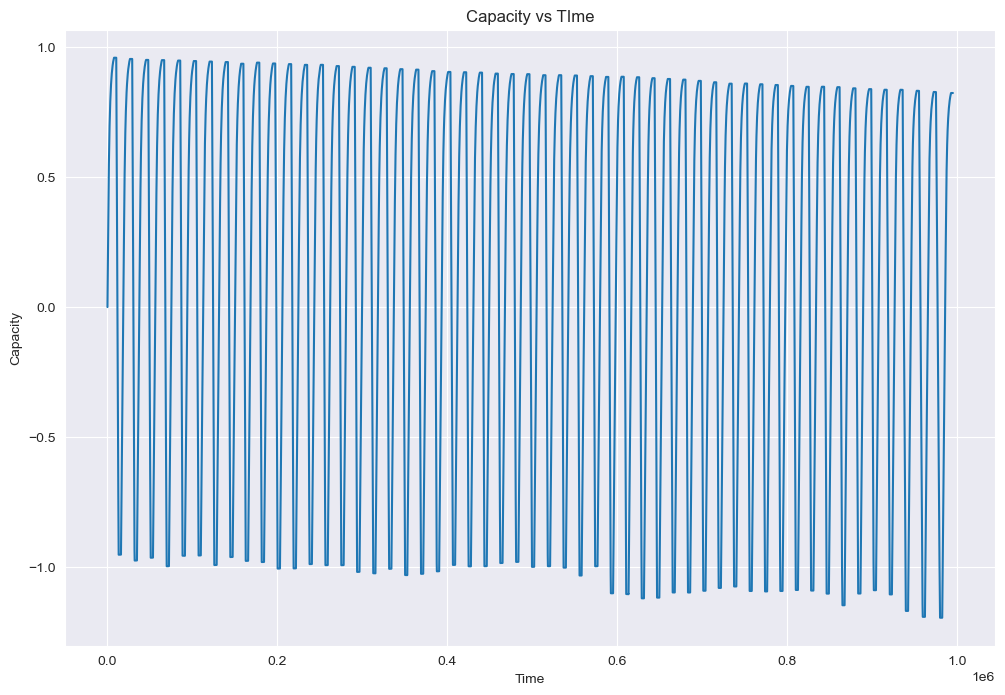

In [12]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Local Maxima and Minima

In [13]:
# %%time
# from scipy.signal import argrelextrema
# import numpy as np

# ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
# ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

# df.Capacity.plot(figsize=(20,12), alpha=.3)
# # filter prices that are peaks and plot them differently to be visable on the plot
# df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
# df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
# plt.ylabel("Capacity")
# plt.xlabel("Time")
# plt.title('Local Maxima and Local Minima')

In [14]:
# maximum_point = df['Capacity'][ilocs_max].unique()
# minimum_point = df['Capacity'][ilocs_min].unique()

In [15]:
# print(maximum_point)
# print(maximum_point.max())
# print(minimum_point)

In [16]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [17]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


# Integral current

In [18]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

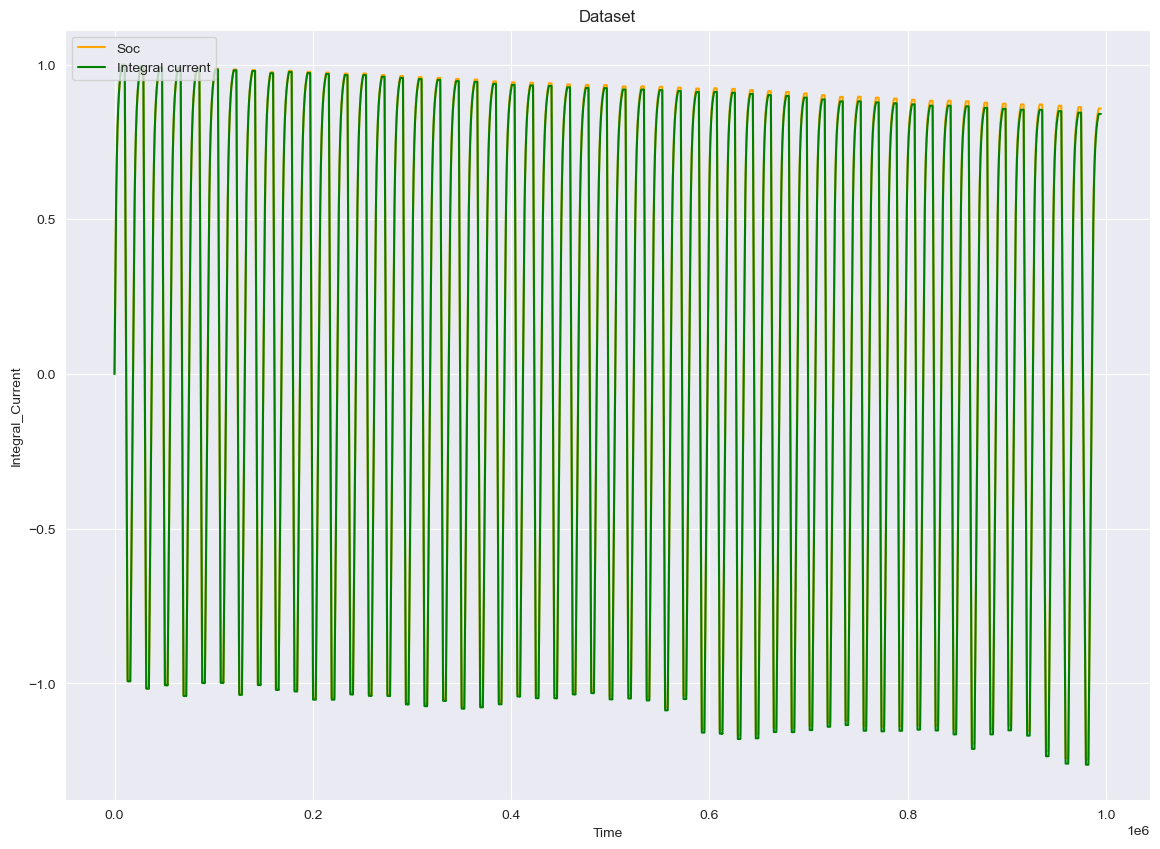

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [20]:
df.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737,0.000181
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510,0.000542
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812,0.000903
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338,0.001264


In [21]:
df.insert(loc = 5,column ='Energy',value=df['Integral_current']*df["Potential"]) # do add if needed 

In [22]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Energy,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,0.786177,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,2.992199,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-4.550012,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,-2.255127,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,1.844648,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3.607332,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,4.196637,3453.550000,0.999371


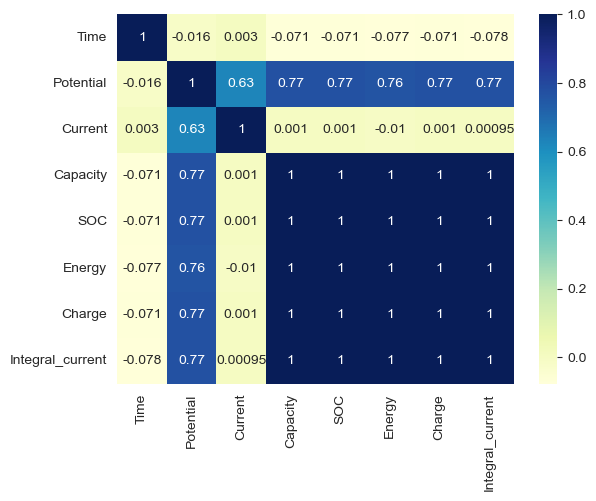

<Figure size 1400x1000 with 0 Axes>

In [23]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [24]:
timesta = df.pop('Time')

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Potential','Current','Capacity','SOC','Energy','Charge','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [26]:
df.head()

,Potential,Current,Capacity,SOC,Energy,Charge,Integral_current
0,0.822158,0.969868,0.554717,0.554717,0.520201,0.554717,0.558203
1,0.824159,0.969847,0.554823,0.554823,0.520282,0.554823,0.558283
2,0.826242,0.969850,0.554996,0.554996,0.520445,0.554996,0.558443
3,0.828049,0.969850,0.555148,0.555148,0.520608,0.555148,0.558602
4,0.829519,0.969850,0.555320,0.555320,0.520772,0.555320,0.558762


In [27]:
Y = df.pop('Energy')
X = df

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [29]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 6), (198976, 6), (795903,), (198976,))

In [30]:
X_train.head()

,Potential,Current,Capacity,SOC,Charge,Integral_current
813724,0.724708,0.969682,0.239713,0.239713,0.239713,0.238732
816076,0.920402,0.969674,0.617943,0.617943,0.617943,0.613971
330647,0.198826,0.000217,0.306337,0.306337,0.306337,0.308734
820906,0.999614,0.671424,0.933947,0.933947,0.933947,0.927542
826688,0.364044,0.000481,0.469897,0.469897,0.469897,0.467085


In [31]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:

callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC Function

In [34]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

# Modeling

In [35]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(80,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'linear'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 18s 3ms/step - loss: 0.0165 - rmse: 0.0327 - mae: 0.0165 - mse: 0.0011 - mape: 10.7568 - val_loss: 0.0159 - val_rmse: 0.0261 - val_mae: 0.0159 - val_mse: 6.7966e-04 - val_mape: 6.6849
Epoch 2/100
6218/6218 [==============================] - 17s 3ms/step - loss: 0.0144 - rmse: 0.0245 - mae: 0.0144 - mse: 6.0189e-04 - mape: 18.8449 - val_loss: 0.0135 - val_rmse: 0.0239 - val_mae: 0.0135 - val_mse: 5.7087e-04 - val_mape: 5.5284
Epoch 3/100
6218/6218 [==============================] - 17s 3ms/step - loss: 0.0137 - rmse: 0.0244 - mae: 0.0137 - mse: 5.9305e-04 - mape: 23.9130 - val_loss: 0.0131 - val_rmse: 0.0243 - val_mae: 0.0131 - val_mse: 5.9244e-04 - val_mape: 6.2769
Epoch 4/100
6218/6218 [==============================] - 17s 3ms/step - loss: 0.0134 - rmse: 0.0242 - mae: 0.0134 - mse: 5.8786e-04 - mape: 22.5720 - val_loss: 0.0143 - val_rmse: 0.0243 - val_mae: 0.0143 - val_mse: 5.9234e-04 - val_mape: 6.6624
Epoch 5/100
6218/6218 [=

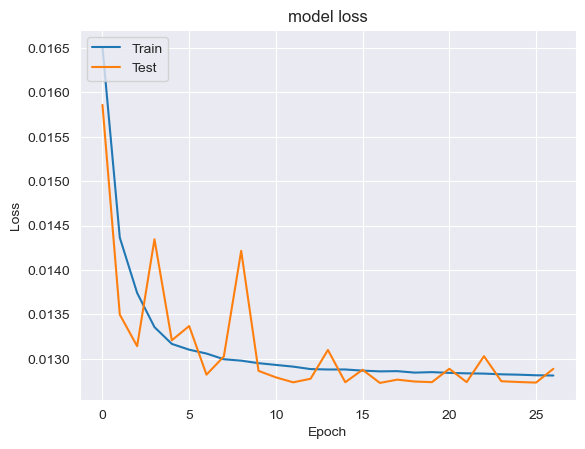

In [36]:
plot_his(history_1)

In [37]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 0.0129 - rmse: 0.0239 - mae: 0.0129 - mse: 5.7288e-04 - mape: 6.5244


[0.012888065539300442,
 0.023934975266456604,
 0.012888065539300442,
 0.0005728830583393574,
 6.524410724639893]

In [38]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                560       
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


In [40]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  11300.864


# Model 2

In [41]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0016 - rmse: 0.0065 - mae: 0.0016 - mse: 4.2841e-05 - mape: 7.8215 - val_loss: 8.0335e-04 - val_rmse: 0.0012 - val_mae: 8.0335e-04 - val_mse: 1.3809e-06 - val_mape: 0.7841
Epoch 2/100
24872/24872 [==============================] - 65s 3ms/step - loss: 7.3252e-04 - rmse: 0.0011 - mae: 7.3252e-04 - mse: 1.1360e-06 - mape: 9.5864 - val_loss: 6.8009e-04 - val_rmse: 9.4231e-04 - val_mae: 6.8009e-04 - val_mse: 8.8794e-07 - val_mape: 0.7116
Epoch 3/100
24872/24872 [==============================] - 65s 3ms/step - loss: 5.8972e-04 - rmse: 8.6305e-04 - mae: 5.8972e-04 - mse: 7.4486e-07 - mape: 7.3222 - val_loss: 5.4002e-04 - val_rmse: 7.9490e-04 - val_mae: 5.4002e-04 - val_mse: 6.3187e-07 - val_mape: 0.5315
Epoch 4/100
24872/24872 [==============================] - 63s 3ms/step - loss: 5.0846e-04 - rmse: 7.4831e-04 - mae: 5.0846e-04 - mse: 5.5997e-07 - mape: 6.8539 - val_loss: 4.6022e-04 - val_rmse: 7.0408e-04 - v

24872/24872 [==============================] - 66s 3ms/step - loss: 2.8156e-04 - rmse: 4.5039e-04 - mae: 2.8156e-04 - mse: 2.0285e-07 - mape: 2.6790 - val_loss: 2.8238e-04 - val_rmse: 4.4728e-04 - val_mae: 2.8238e-04 - val_mse: 2.0006e-07 - val_mape: 0.2168
Epoch 32/100
24872/24872 [==============================] - 65s 3ms/step - loss: 2.7897e-04 - rmse: 4.4700e-04 - mae: 2.7897e-04 - mse: 1.9981e-07 - mape: 2.6918 - val_loss: 2.7440e-04 - val_rmse: 4.4482e-04 - val_mae: 2.7440e-04 - val_mse: 1.9786e-07 - val_mape: 0.2268
Epoch 33/100
24872/24872 [==============================] - 67s 3ms/step - loss: 2.7655e-04 - rmse: 4.4399e-04 - mae: 2.7655e-04 - mse: 1.9713e-07 - mape: 2.8639 - val_loss: 2.8937e-04 - val_rmse: 4.4754e-04 - val_mae: 2.8937e-04 - val_mse: 2.0030e-07 - val_mape: 0.2320
Epoch 34/100
24872/24872 [==============================] - 67s 3ms/step - loss: 2.7465e-04 - rmse: 4.4136e-04 - mae: 2.7465e-04 - mse: 1.9480e-07 - mape: 2.9517 - val_loss: 2.7670e-04 - val_rmse: 4.3

24872/24872 [==============================] - 65s 3ms/step - loss: 2.3898e-04 - rmse: 4.0023e-04 - mae: 2.3898e-04 - mse: 1.6018e-07 - mape: 6.2744 - val_loss: 2.3645e-04 - val_rmse: 3.9698e-04 - val_mae: 2.3645e-04 - val_mse: 1.5760e-07 - val_mape: 0.3817
Epoch 62/100
24872/24872 [==============================] - 67s 3ms/step - loss: 2.3820e-04 - rmse: 3.9934e-04 - mae: 2.3820e-04 - mse: 1.5947e-07 - mape: 6.3283 - val_loss: 2.3587e-04 - val_rmse: 3.9836e-04 - val_mae: 2.3587e-04 - val_mse: 1.5869e-07 - val_mape: 0.3854
Epoch 63/100
24872/24872 [==============================] - 67s 3ms/step - loss: 2.3725e-04 - rmse: 3.9868e-04 - mae: 2.3725e-04 - mse: 1.5895e-07 - mape: 6.2520 - val_loss: 2.3433e-04 - val_rmse: 3.9783e-04 - val_mae: 2.3433e-04 - val_mse: 1.5827e-07 - val_mape: 0.3909
Epoch 64/100
24872/24872 [==============================] - 65s 3ms/step - loss: 2.3620e-04 - rmse: 3.9797e-04 - mae: 2.3620e-04 - mse: 1.5838e-07 - mape: 6.2787 - val_loss: 2.3679e-04 - val_rmse: 3.9

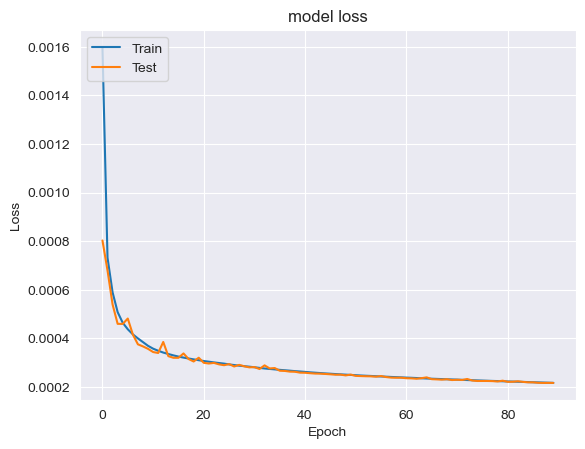

In [42]:
plot_his(history_2)

In [43]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 2.1712e-04 - rmse: 3.8320e-04 - mae: 2.1712e-04 - mse: 1.4684e-07 - mape: 0.3956


[0.00021712275338359177,
 0.0003832018410321325,
 0.00021712275338359177,
 1.468436465756895e-07,
 0.39560094475746155]

In [44]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [45]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11600.863


# Model 3

In [46]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=128, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 20s 3ms/step - loss: 0.0040 - rmse: 0.0171 - mae: 0.0040 - mse: 2.9197e-04 - mape: 5.8847 - val_loss: 0.0015 - val_rmse: 0.0019 - val_mae: 0.0015 - val_mse: 3.6085e-06 - val_mape: 0.4890
Epoch 2/100
6218/6218 [==============================] - 18s 3ms/step - loss: 0.0018 - rmse: 0.0023 - mae: 0.0018 - mse: 5.1968e-06 - mape: 3.4356 - val_loss: 0.0027 - val_rmse: 0.0031 - val_mae: 0.0027 - val_mse: 9.4584e-06 - val_mape: 0.9172
Epoch 3/100
6218/6218 [==============================] - 18s 3ms/step - loss: 0.0014 - rmse: 0.0018 - mae: 0.0014 - mse: 3.1467e-06 - mape: 2.7534 - val_loss: 0.0042 - val_rmse: 0.0047 - val_mae: 0.0042 - val_mse: 2.2041e-05 - val_mape: 1.1743
Epoch 4/100
6218/6218 [==============================] - 18s 3ms/step - loss: 0.0012 - rmse: 0.0016 - mae: 0.0012 - mse: 2.5669e-06 - mape: 1.2265 - val_loss: 8.8043e-04 - val_rmse: 0.0012 - val_mae: 8.8043e-04 - val_mse: 1.4508e-06 - val_mape: 0.3875
Epoch 5/100
6218

Epoch 33/100
6218/6218 [==============================] - 21s 3ms/step - loss: 6.2322e-04 - rmse: 9.3615e-04 - mae: 6.2322e-04 - mse: 8.7637e-07 - mape: 2.3408 - val_loss: 5.9346e-04 - val_rmse: 9.0050e-04 - val_mae: 5.9346e-04 - val_mse: 8.1090e-07 - val_mape: 0.3987
Epoch 34/100
6218/6218 [==============================] - 21s 3ms/step - loss: 6.1935e-04 - rmse: 9.3425e-04 - mae: 6.1935e-04 - mse: 8.7281e-07 - mape: 1.9290 - val_loss: 5.7936e-04 - val_rmse: 9.2266e-04 - val_mae: 5.7936e-04 - val_mse: 8.5129e-07 - val_mape: 0.3618
Epoch 35/100
6218/6218 [==============================] - 20s 3ms/step - loss: 6.1233e-04 - rmse: 9.3090e-04 - mae: 6.1233e-04 - mse: 8.6657e-07 - mape: 1.9949 - val_loss: 6.9350e-04 - val_rmse: 9.7489e-04 - val_mae: 6.9350e-04 - val_mse: 9.5041e-07 - val_mape: 0.3771
Epoch 36/100
6218/6218 [==============================] - 21s 3ms/step - loss: 6.0377e-04 - rmse: 9.2759e-04 - mae: 6.0377e-04 - mse: 8.6042e-07 - mape: 2.0677 - val_loss: 5.7128e-04 - val_rmse

6218/6218 [==============================] - 18s 3ms/step - loss: 5.2503e-04 - rmse: 9.3864e-04 - mae: 5.2503e-04 - mse: 8.8104e-07 - mape: 0.6035 - val_loss: 5.0220e-04 - val_rmse: 9.0789e-04 - val_mae: 5.0220e-04 - val_mse: 8.2427e-07 - val_mape: 0.2819
Epoch 64/100
6218/6218 [==============================] - 21s 3ms/step - loss: 5.1902e-04 - rmse: 9.4096e-04 - mae: 5.1902e-04 - mse: 8.8541e-07 - mape: 0.3328 - val_loss: 5.9274e-04 - val_rmse: 9.7588e-04 - val_mae: 5.9274e-04 - val_mse: 9.5233e-07 - val_mape: 0.2812
Epoch 65/100
6218/6218 [==============================] - 21s 3ms/step - loss: 5.1629e-04 - rmse: 9.5073e-04 - mae: 5.1629e-04 - mse: 9.0389e-07 - mape: 0.8388 - val_loss: 4.8823e-04 - val_rmse: 9.3685e-04 - val_mae: 4.8823e-04 - val_mse: 8.7769e-07 - val_mape: 0.2917
Epoch 66/100
6218/6218 [==============================] - 21s 3ms/step - loss: 5.1035e-04 - rmse: 9.5836e-04 - mae: 5.1035e-04 - mse: 9.1846e-07 - mape: 0.7299 - val_loss: 4.7680e-04 - val_rmse: 9.2884e-04 

6218/6218 [==============================] - 20s 3ms/step - loss: 4.4253e-04 - rmse: 8.2697e-04 - mae: 4.4253e-04 - mse: 6.8388e-07 - mape: 5.8203 - val_loss: 4.3192e-04 - val_rmse: 8.1787e-04 - val_mae: 4.3192e-04 - val_mse: 6.6891e-07 - val_mape: 0.4791
Epoch 94/100
6218/6218 [==============================] - 19s 3ms/step - loss: 4.4331e-04 - rmse: 8.2658e-04 - mae: 4.4331e-04 - mse: 6.8324e-07 - mape: 5.8184 - val_loss: 4.2357e-04 - val_rmse: 8.1502e-04 - val_mae: 4.2357e-04 - val_mse: 6.6426e-07 - val_mape: 0.4779
Epoch 95/100
6218/6218 [==============================] - 17s 3ms/step - loss: 4.4136e-04 - rmse: 8.2694e-04 - mae: 4.4136e-04 - mse: 6.8383e-07 - mape: 5.9163 - val_loss: 4.3967e-04 - val_rmse: 8.2412e-04 - val_mae: 4.3967e-04 - val_mse: 6.7917e-07 - val_mape: 0.4752
Epoch 96/100
6218/6218 [==============================] - 20s 3ms/step - loss: 4.4054e-04 - rmse: 8.2730e-04 - mae: 4.4054e-04 - mse: 6.8442e-07 - mape: 5.9628 - val_loss: 4.4998e-04 - val_rmse: 8.0719e-04 

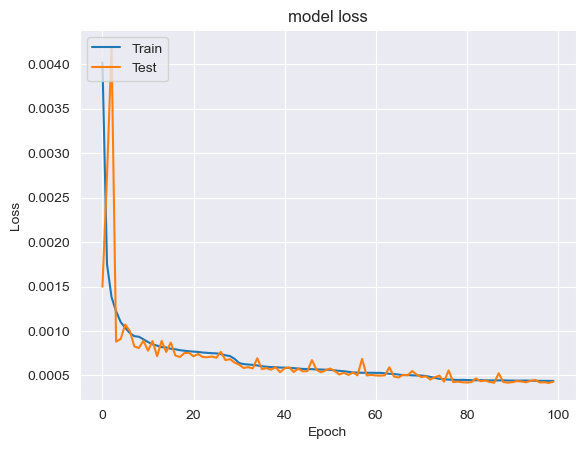

In [47]:
plot_his(history_3)

In [48]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 15s 2ms/step - loss: 4.3027e-04 - rmse: 8.2059e-04 - mae: 4.3027e-04 - mse: 6.7337e-07 - mape: 0.4814


[0.00043027225183323026,
 0.0008205935009755194,
 0.00043027225183323026,
 6.733737336617196e-07,
 0.48141103982925415]

In [49]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [50]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  9120.864


# Model 4

In [51]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0024 - rmse: 0.0066 - mae: 0.0024 - mse: 4.3211e-05 - mape: 4.7733 - val_loss: 0.0013 - val_rmse: 0.0020 - val_mae: 0.0013 - val_mse: 3.8106e-06 - val_mape: 1.1558
Epoch 2/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0011 - rmse: 0.0017 - mae: 0.0011 - mse: 3.0446e-06 - mape: 14.3693 - val_loss: 0.0010 - val_rmse: 0.0017 - val_mae: 0.0010 - val_mse: 2.7738e-06 - val_mape: 1.2654
Epoch 3/100
24872/24872 [==============================] - 77s 3ms/step - loss: 9.1735e-04 - rmse: 0.0015 - mae: 9.1735e-04 - mse: 2.3876e-06 - mape: 13.2746 - val_loss: 8.0414e-04 - val_rmse: 0.0014 - val_mae: 8.0414e-04 - val_mse: 1.8820e-06 - val_mape: 0.4214
Epoch 4/100
24872/24872 [==============================] - 75s 3ms/step - loss: 8.2023e-04 - rmse: 0.0014 - mae: 8.2023e-04 - mse: 1.8752e-06 - mape: 8.0600 - val_loss: 9.1226e-04 - val_rmse: 0.0014 - val_mae: 9.1226e-04 - val_mse: 1.9228e-06 -

24872/24872 [==============================] - 78s 3ms/step - loss: 5.8647e-04 - rmse: 0.0011 - mae: 5.8647e-04 - mse: 1.1669e-06 - mape: 25.6727 - val_loss: 5.8501e-04 - val_rmse: 0.0011 - val_mae: 5.8501e-04 - val_mse: 1.1674e-06 - val_mape: 1.5552
Epoch 33/100
24872/24872 [==============================] - 81s 3ms/step - loss: 5.8454e-04 - rmse: 0.0011 - mae: 5.8454e-04 - mse: 1.1545e-06 - mape: 25.8166 - val_loss: 5.8426e-04 - val_rmse: 0.0011 - val_mae: 5.8426e-04 - val_mse: 1.1583e-06 - val_mape: 1.5193
Epoch 34/100
24872/24872 [==============================] - 81s 3ms/step - loss: 5.8315e-04 - rmse: 0.0011 - mae: 5.8315e-04 - mse: 1.1455e-06 - mape: 24.7712 - val_loss: 5.7886e-04 - val_rmse: 0.0011 - val_mae: 5.7886e-04 - val_mse: 1.1300e-06 - val_mape: 1.4862
Epoch 35/100
24872/24872 [==============================] - 76s 3ms/step - loss: 5.8189e-04 - rmse: 0.0011 - mae: 5.8189e-04 - mse: 1.1347e-06 - mape: 24.6545 - val_loss: 5.8362e-04 - val_rmse: 0.0011 - val_mae: 5.8362e-0

Epoch 63/100
24872/24872 [==============================] - 78s 3ms/step - loss: 5.3226e-04 - rmse: 9.2329e-04 - mae: 5.3226e-04 - mse: 8.5247e-07 - mape: 12.5207 - val_loss: 5.2928e-04 - val_rmse: 9.1812e-04 - val_mae: 5.2928e-04 - val_mse: 8.4294e-07 - val_mape: 0.8122
Epoch 64/100
24872/24872 [==============================] - 79s 3ms/step - loss: 5.3032e-04 - rmse: 9.1921e-04 - mae: 5.3032e-04 - mse: 8.4495e-07 - mape: 12.4128 - val_loss: 5.3067e-04 - val_rmse: 9.2080e-04 - val_mae: 5.3067e-04 - val_mse: 8.4786e-07 - val_mape: 0.7938
Epoch 65/100
24872/24872 [==============================] - 81s 3ms/step - loss: 5.2854e-04 - rmse: 9.1535e-04 - mae: 5.2854e-04 - mse: 8.3786e-07 - mape: 11.8240 - val_loss: 5.3515e-04 - val_rmse: 9.1226e-04 - val_mae: 5.3515e-04 - val_mse: 8.3222e-07 - val_mape: 0.7793
Epoch 66/100
24872/24872 [==============================] - 84s 3ms/step - loss: 5.2687e-04 - rmse: 9.1147e-04 - mae: 5.2687e-04 - mse: 8.3078e-07 - mape: 11.6699 - val_loss: 5.2389e-0

24872/24872 [==============================] - 83s 3ms/step - loss: 4.8331e-04 - rmse: 8.4171e-04 - mae: 4.8331e-04 - mse: 7.0847e-07 - mape: 8.8416 - val_loss: 4.8126e-04 - val_rmse: 8.4166e-04 - val_mae: 4.8126e-04 - val_mse: 7.0840e-07 - val_mape: 0.6384
Epoch 94/100
24872/24872 [==============================] - 74s 3ms/step - loss: 4.8281e-04 - rmse: 8.4200e-04 - mae: 4.8281e-04 - mse: 7.0897e-07 - mape: 8.8310 - val_loss: 4.8287e-04 - val_rmse: 8.4503e-04 - val_mae: 4.8287e-04 - val_mse: 7.1408e-07 - val_mape: 0.6471
Epoch 95/100
24872/24872 [==============================] - 78s 3ms/step - loss: 4.8209e-04 - rmse: 8.4135e-04 - mae: 4.8209e-04 - mse: 7.0787e-07 - mape: 8.8075 - val_loss: 4.8052e-04 - val_rmse: 8.4410e-04 - val_mae: 4.8052e-04 - val_mse: 7.1251e-07 - val_mape: 0.6395
Epoch 96/100
24872/24872 [==============================] - 87s 3ms/step - loss: 4.8175e-04 - rmse: 8.4121e-04 - mae: 4.8175e-04 - mse: 7.0763e-07 - mape: 9.0010 - val_loss: 4.8246e-04 - val_rmse: 8.4

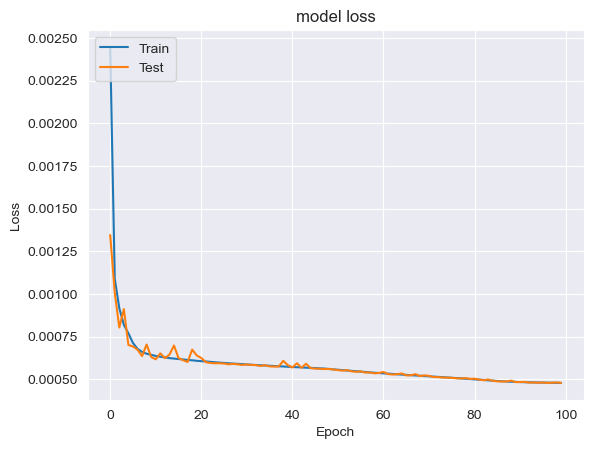

In [52]:
plot_his(history_4)

In [53]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 4.8004e-04 - rmse: 8.3545e-04 - mae: 4.8004e-04 - mse: 6.9797e-07 - mape: 0.6580


[0.00048004332347773015,
 0.0008354455349035561,
 0.00048004332347773015,
 6.979691988817649e-07,
 0.6579664945602417]

In [54]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 12s 2ms/step


In [55]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  23940.863


# Model 5

In [56]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 234s 9ms/step - loss: 0.0040 - rmse: 0.0191 - mae: 0.0040 - mse: 3.6460e-04 - mape: 8.1461 - val_loss: 0.0013 - val_rmse: 0.0020 - val_mae: 0.0013 - val_mse: 3.9076e-06 - val_mape: 0.8096
Epoch 2/50
24872/24872 [==============================] - 224s 9ms/step - loss: 0.0015 - rmse: 0.0022 - mae: 0.0015 - mse: 4.7456e-06 - mape: 7.7651 - val_loss: 0.0016 - val_rmse: 0.0022 - val_mae: 0.0016 - val_mse: 4.7999e-06 - val_mape: 0.9001
Epoch 3/50
24872/24872 [==============================] - 222s 9ms/step - loss: 0.0012 - rmse: 0.0020 - mae: 0.0012 - mse: 3.9565e-06 - mape: 5.2459 - val_loss: 0.0011 - val_rmse: 0.0018 - val_mae: 0.0011 - val_mse: 3.4029e-06 - val_mape: 0.7643
Epoch 4/50
24872/24872 [==============================] - 219s 9ms/step - loss: 0.0011 - rmse: 0.0018 - mae: 0.0011 - mse: 3.3988e-06 - mape: 6.6697 - val_loss: 0.0013 - val_rmse: 0.0019 - val_mae: 0.0013 - val_mse: 3.5647e-06 - val_mape: 0.7296
Epoch 5/50
24872

Epoch 32/50
24872/24872 [==============================] - 190s 8ms/step - loss: 3.1907e-04 - rmse: 6.4421e-04 - mae: 3.1907e-04 - mse: 4.1501e-07 - mape: 0.4896 - val_loss: 3.0189e-04 - val_rmse: 6.2496e-04 - val_mae: 3.0189e-04 - val_mse: 3.9057e-07 - val_mape: 0.1396
Epoch 33/50
24872/24872 [==============================] - 193s 8ms/step - loss: 3.1023e-04 - rmse: 6.2920e-04 - mae: 3.1023e-04 - mse: 3.9589e-07 - mape: 0.2115 - val_loss: 3.0135e-04 - val_rmse: 6.0933e-04 - val_mae: 3.0135e-04 - val_mse: 3.7129e-07 - val_mape: 0.1349
Epoch 34/50
24872/24872 [==============================] - 192s 8ms/step - loss: 3.0247e-04 - rmse: 6.1492e-04 - mae: 3.0247e-04 - mse: 3.7813e-07 - mape: 0.2399 - val_loss: 3.1467e-04 - val_rmse: 6.0818e-04 - val_mae: 3.1467e-04 - val_mse: 3.6989e-07 - val_mape: 0.1522
Epoch 35/50
24872/24872 [==============================] - 190s 8ms/step - loss: 2.9132e-04 - rmse: 5.9741e-04 - mae: 2.9132e-04 - mse: 3.5690e-07 - mape: 0.4131 - val_loss: 2.9296e-04 - 

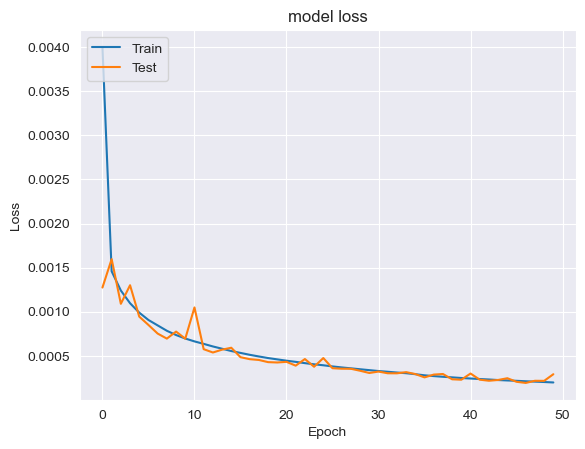

In [57]:
plot_his(history_5)

In [58]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 21s 3ms/step - loss: 2.9117e-04 - rmse: 4.6742e-04 - mae: 2.9117e-04 - mse: 2.1848e-07 - mape: 0.1232


[0.0002911731135100126,
 0.0004674202064052224,
 0.0002911731135100126,
 2.1848164521998115e-07,
 0.12322814762592316]

In [59]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 20s 3ms/step


In [61]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25700.863


# Model 6

In [62]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 233s 9ms/step - loss: 0.0038 - rmse: 0.0152 - mae: 0.0038 - mse: 2.3092e-04 - mape: 9.9842 - val_loss: 0.0021 - val_rmse: 0.0024 - val_mae: 0.0021 - val_mse: 6.0012e-06 - val_mape: 0.6951
Epoch 2/40
24872/24872 [==============================] - 222s 9ms/step - loss: 0.0014 - rmse: 0.0019 - mae: 0.0014 - mse: 3.5349e-06 - mape: 2.2193 - val_loss: 0.0013 - val_rmse: 0.0017 - val_mae: 0.0013 - val_mse: 2.7789e-06 - val_mape: 0.7939
Epoch 3/40
24872/24872 [==============================] - 224s 9ms/step - loss: 0.0010 - rmse: 0.0014 - mae: 0.0010 - mse: 2.0318e-06 - mape: 3.9192 - val_loss: 7.5229e-04 - val_rmse: 0.0011 - val_mae: 7.5229e-04 - val_mse: 1.2379e-06 - val_mape: 0.5331
Epoch 4/40
24872/24872 [==============================] - 225s 9ms/step - loss: 7.8544e-04 - rmse: 0.0011 - mae: 7.8544e-04 - mse: 1.2691e-06 - mape: 3.9804 - val_loss: 5.2769e-04 - val_rmse: 8.8821e-04 - val_mae: 5.2769e-04 - val_mse: 7.8893e-07 - val_m

24872/24872 [==============================] - 201s 8ms/step - loss: 9.5494e-05 - rmse: 1.4784e-04 - mae: 9.5494e-05 - mse: 2.1856e-08 - mape: 0.7526 - val_loss: 9.2609e-05 - val_rmse: 1.3822e-04 - val_mae: 9.2609e-05 - val_mse: 1.9105e-08 - val_mape: 0.0490
Epoch 32/40
24872/24872 [==============================] - 200s 8ms/step - loss: 9.2793e-05 - rmse: 1.4431e-04 - mae: 9.2793e-05 - mse: 2.0824e-08 - mape: 0.2440 - val_loss: 1.0825e-04 - val_rmse: 1.5270e-04 - val_mae: 1.0825e-04 - val_mse: 2.3317e-08 - val_mape: 0.0516
Epoch 33/40
24872/24872 [==============================] - 200s 8ms/step - loss: 9.0309e-05 - rmse: 1.4091e-04 - mae: 9.0309e-05 - mse: 1.9855e-08 - mape: 0.3092 - val_loss: 7.1805e-05 - val_rmse: 1.2471e-04 - val_mae: 7.1805e-05 - val_mse: 1.5551e-08 - val_mape: 0.0504
Epoch 34/40
24872/24872 [==============================] - 201s 8ms/step - loss: 8.7637e-05 - rmse: 1.3780e-04 - mae: 8.7637e-05 - mse: 1.8988e-08 - mape: 0.4125 - val_loss: 9.4855e-05 - val_rmse: 1.

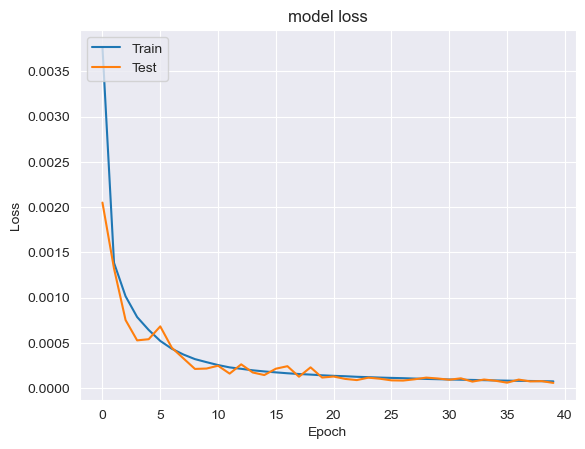

In [63]:
plot_his(history_6)

In [64]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 23s 4ms/step - loss: 5.7353e-05 - rmse: 1.0815e-04 - mae: 5.7353e-05 - mse: 1.1696e-08 - mape: 0.0383


[5.735345621360466e-05,
 0.00010814645793288946,
 5.735345621360466e-05,
 1.1695656887411587e-08,
 0.03830968588590622]

In [65]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [66]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 21s 3ms/step


In [67]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65840.87


# Model 7

In [68]:
%%time
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 56s 8ms/step - loss: 0.0103 - rmse: 0.0374 - mae: 0.0103 - mse: 0.0014 - mape: 16.9025 - val_loss: 0.0038 - val_rmse: 0.0043 - val_mae: 0.0038 - val_mse: 1.8380e-05 - val_mape: 1.1415
Epoch 2/70
6218/6218 [==============================] - 51s 8ms/step - loss: 0.0028 - rmse: 0.0037 - mae: 0.0028 - mse: 1.3507e-05 - mape: 4.2837 - val_loss: 0.0014 - val_rmse: 0.0021 - val_mae: 0.0014 - val_mse: 4.5406e-06 - val_mape: 0.6352
Epoch 3/70
6218/6218 [==============================] - 51s 8ms/step - loss: 0.0020 - rmse: 0.0027 - mae: 0.0020 - mse: 7.0529e-06 - mape: 1.8737 - val_loss: 0.0022 - val_rmse: 0.0026 - val_mae: 0.0022 - val_mse: 7.0029e-06 - val_mape: 0.7891
Epoch 4/70
6218/6218 [==============================] - 50s 8ms/step - loss: 0.0017 - rmse: 0.0024 - mae: 0.0017 - mse: 5.5316e-06 - mape: 2.2305 - val_loss: 0.0014 - val_rmse: 0.0020 - val_mae: 0.0014 - val_mse: 3.8497e-06 - val_mape: 0.6478
Epoch 5/70
6218/6218 [=========

6218/6218 [==============================] - 50s 8ms/step - loss: 8.9606e-04 - rmse: 0.0013 - mae: 8.9606e-04 - mse: 1.8174e-06 - mape: 3.1166 - val_loss: 8.9880e-04 - val_rmse: 0.0013 - val_mae: 8.9880e-04 - val_mse: 1.7936e-06 - val_mape: 0.5154
Epoch 35/70
6218/6218 [==============================] - 50s 8ms/step - loss: 8.8432e-04 - rmse: 0.0013 - mae: 8.8432e-04 - mse: 1.7943e-06 - mape: 2.8641 - val_loss: 8.7010e-04 - val_rmse: 0.0013 - val_mae: 8.7010e-04 - val_mse: 1.7249e-06 - val_mape: 0.5102
Epoch 36/70
6218/6218 [==============================] - 50s 8ms/step - loss: 8.7723e-04 - rmse: 0.0013 - mae: 8.7723e-04 - mse: 1.7764e-06 - mape: 2.9094 - val_loss: 8.5549e-04 - val_rmse: 0.0013 - val_mae: 8.5549e-04 - val_mse: 1.7180e-06 - val_mape: 0.5528
Epoch 37/70
6218/6218 [==============================] - 50s 8ms/step - loss: 8.6703e-04 - rmse: 0.0013 - mae: 8.6703e-04 - mse: 1.7545e-06 - mape: 2.8307 - val_loss: 8.2325e-04 - val_rmse: 0.0013 - val_mae: 8.2325e-04 - val_mse: 1.

Epoch 66/70
6218/6218 [==============================] - 50s 8ms/step - loss: 7.0692e-04 - rmse: 0.0012 - mae: 7.0692e-04 - mse: 1.3580e-06 - mape: 2.8199 - val_loss: 7.7561e-04 - val_rmse: 0.0012 - val_mae: 7.7561e-04 - val_mse: 1.4100e-06 - val_mape: 0.5137
Epoch 67/70
6218/6218 [==============================] - 50s 8ms/step - loss: 7.0329e-04 - rmse: 0.0012 - mae: 7.0329e-04 - mse: 1.3477e-06 - mape: 3.2053 - val_loss: 6.7538e-04 - val_rmse: 0.0011 - val_mae: 6.7538e-04 - val_mse: 1.2742e-06 - val_mape: 0.4928
Epoch 68/70
6218/6218 [==============================] - 50s 8ms/step - loss: 6.9891e-04 - rmse: 0.0012 - mae: 6.9891e-04 - mse: 1.3393e-06 - mape: 2.9267 - val_loss: 6.8453e-04 - val_rmse: 0.0011 - val_mae: 6.8453e-04 - val_mse: 1.2780e-06 - val_mape: 0.4822
Epoch 69/70
6218/6218 [==============================] - 50s 8ms/step - loss: 6.9327e-04 - rmse: 0.0012 - mae: 6.9327e-04 - mse: 1.3283e-06 - mape: 2.4414 - val_loss: 7.3737e-04 - val_rmse: 0.0011 - val_mae: 7.3737e-04 -

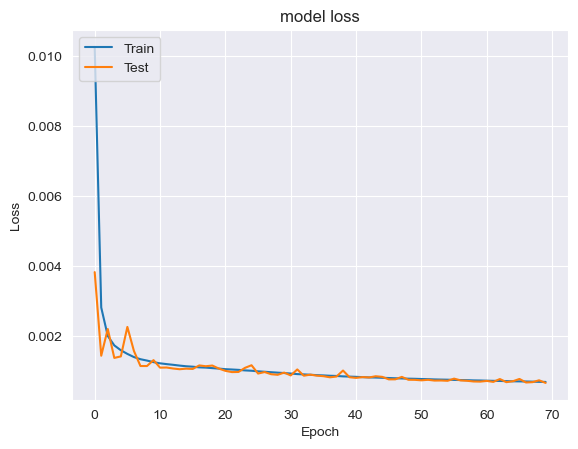

In [69]:
plot_his(history_7)

In [70]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 17s 3ms/step


In [71]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 20s 3ms/step - loss: 6.6249e-04 - rmse: 0.0011 - mae: 6.6249e-04 - mse: 1.2424e-06 - mape: 0.4989


[0.0006624943925999105,
 0.0011146392207592726,
 0.0006624943925999105,
 1.2424206943251193e-06,
 0.4988615810871124]

In [72]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [73]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11200.864


# Model 8

In [74]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 124s 10ms/step - loss: 0.0040 - rmse: 0.0225 - mae: 0.0040 - mse: 5.0558e-04 - mape: 12.3401 - val_loss: 0.0015 - val_rmse: 0.0021 - val_mae: 0.0015 - val_mse: 4.2733e-06 - val_mape: 1.0081
Epoch 2/40
12436/12436 [==============================] - 122s 10ms/step - loss: 0.0013 - rmse: 0.0019 - mae: 0.0013 - mse: 3.7699e-06 - mape: 4.5450 - val_loss: 0.0012 - val_rmse: 0.0018 - val_mae: 0.0012 - val_mse: 3.3879e-06 - val_mape: 0.6190
Epoch 3/40
12436/12436 [==============================] - 119s 10ms/step - loss: 0.0012 - rmse: 0.0019 - mae: 0.0012 - mse: 3.4262e-06 - mape: 2.8305 - val_loss: 0.0012 - val_rmse: 0.0018 - val_mae: 0.0012 - val_mse: 3.1476e-06 - val_mape: 0.5946
Epoch 4/40
12436/12436 [==============================] - 121s 10ms/step - loss: 0.0012 - rmse: 0.0018 - mae: 0.0012 - mse: 3.2101e-06 - mape: 0.5908 - val_loss: 0.0011 - val_rmse: 0.0018 - val_mae: 0.0011 - val_mse: 3.1720e-06 - val_mape: 0.5569
Epoch 5/40


Epoch 33/40
12436/12436 [==============================] - 140s 11ms/step - loss: 8.9341e-04 - rmse: 0.0014 - mae: 8.9341e-04 - mse: 2.0719e-06 - mape: 1.3005 - val_loss: 8.7980e-04 - val_rmse: 0.0014 - val_mae: 8.7980e-04 - val_mse: 2.0077e-06 - val_mape: 0.4380
Epoch 34/40
12436/12436 [==============================] - 140s 11ms/step - loss: 8.8988e-04 - rmse: 0.0014 - mae: 8.8988e-04 - mse: 2.0539e-06 - mape: 1.3101 - val_loss: 8.7841e-04 - val_rmse: 0.0014 - val_mae: 8.7841e-04 - val_mse: 2.0309e-06 - val_mape: 0.4368
Epoch 35/40
12436/12436 [==============================] - 139s 11ms/step - loss: 8.8663e-04 - rmse: 0.0014 - mae: 8.8663e-04 - mse: 2.0386e-06 - mape: 1.4616 - val_loss: 8.7507e-04 - val_rmse: 0.0014 - val_mae: 8.7507e-04 - val_mse: 1.9892e-06 - val_mape: 0.4447
Epoch 36/40
12436/12436 [==============================] - 140s 11ms/step - loss: 8.8338e-04 - rmse: 0.0014 - mae: 8.8338e-04 - mse: 2.0227e-06 - mape: 1.3906 - val_loss: 8.7747e-04 - val_rmse: 0.0014 - val_m

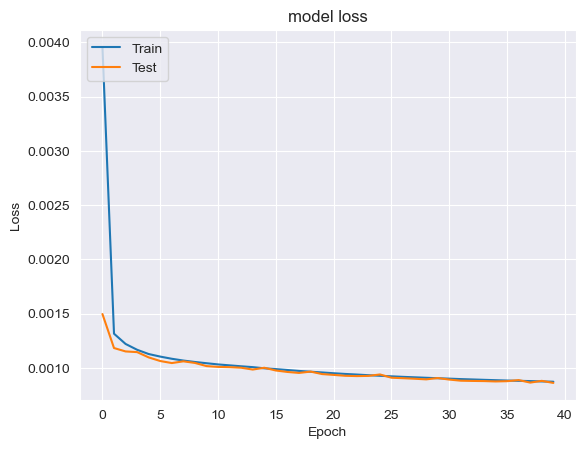

In [75]:
plot_his(history_8)

In [76]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 23s 4ms/step


In [77]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 26s 4ms/step - loss: 8.6141e-04 - rmse: 0.0014 - mae: 8.6141e-04 - mse: 1.9250e-06 - mape: 0.4663


[0.0008614115649834275,
 0.001387452706694603,
 0.0008614115649834275,
 1.9250251170888077e-06,
 0.46627578139305115]

In [78]:
AIC_value(model_8,prediction_8,Y_test)

AIC:  65840.87


# Model 9

In [79]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 75s 3ms/step - loss: 0.0033 - rmse: 0.0286 - mae: 0.0033 - mse: 8.1620e-04 - mape: 7.3051 - val_loss: 0.0013 - val_rmse: 0.0017 - val_mae: 0.0013 - val_mse: 2.9053e-06 - val_mape: 0.9662
Epoch 2/50
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0011 - rmse: 0.0015 - mae: 0.0011 - mse: 2.1832e-06 - mape: 4.7583 - val_loss: 0.0011 - val_rmse: 0.0015 - val_mae: 0.0011 - val_mse: 2.2223e-06 - val_mape: 0.5520
Epoch 3/50
24872/24872 [==============================] - 74s 3ms/step - loss: 8.0483e-04 - rmse: 0.0011 - mae: 8.0483e-04 - mse: 1.2638e-06 - mape: 5.4586 - val_loss: 7.0036e-04 - val_rmse: 9.8761e-04 - val_mae: 7.0036e-04 - val_mse: 9.7538e-07 - val_mape: 0.5537
Epoch 4/50
24872/24872 [==============================] - 74s 3ms/step - loss: 6.9795e-04 - rmse: 9.9745e-04 - mae: 6.9795e-04 - mse: 9.9491e-07 - mape: 6.2743 - val_loss: 8.5890e-04 - val_rmse: 0.0011 - val_mae: 8.5890e-04 - val_mse: 1.2764e-06

Epoch 32/50
24872/24872 [==============================] - 72s 3ms/step - loss: 4.3034e-04 - rmse: 7.7780e-04 - mae: 4.3034e-04 - mse: 6.0497e-07 - mape: 6.8936 - val_loss: 4.2790e-04 - val_rmse: 7.6828e-04 - val_mae: 4.2790e-04 - val_mse: 5.9025e-07 - val_mape: 0.5441
Epoch 33/50
24872/24872 [==============================] - 73s 3ms/step - loss: 4.2790e-04 - rmse: 7.7652e-04 - mae: 4.2790e-04 - mse: 6.0299e-07 - mape: 6.7517 - val_loss: 4.5996e-04 - val_rmse: 7.8628e-04 - val_mae: 4.5996e-04 - val_mse: 6.1824e-07 - val_mape: 0.5281
Epoch 34/50
24872/24872 [==============================] - 71s 3ms/step - loss: 4.2578e-04 - rmse: 7.7585e-04 - mae: 4.2578e-04 - mse: 6.0194e-07 - mape: 6.7554 - val_loss: 4.5815e-04 - val_rmse: 7.8045e-04 - val_mae: 4.5815e-04 - val_mse: 6.0910e-07 - val_mape: 0.5440
Epoch 35/50
24872/24872 [==============================] - 72s 3ms/step - loss: 4.2421e-04 - rmse: 7.7519e-04 - mae: 4.2421e-04 - mse: 6.0092e-07 - mape: 6.8515 - val_loss: 4.1589e-04 - val_

In [80]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 3.9822e-04 - rmse: 7.5318e-04 - mae: 3.9822e-04 - mse: 5.6728e-07 - mape: 0.5145


[0.00039822046528570354,
 0.0007531814044341445,
 0.00039822046528570354,
 5.672822567248659e-07,
 0.5145301222801208]

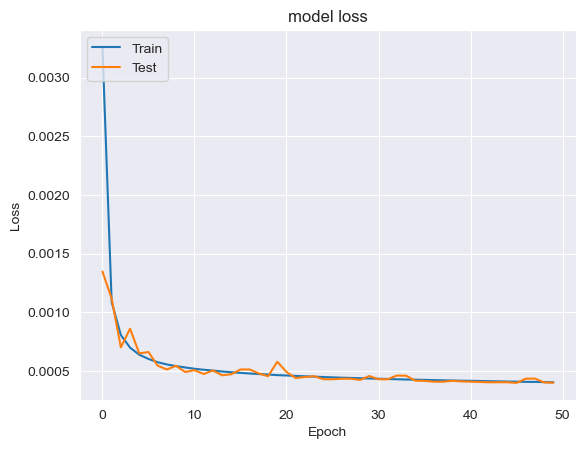

In [81]:
plot_his(history_9)

In [82]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [83]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  740.8638


# Model 10

In [84]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 81s 3ms/step - loss: 0.0030 - rmse: 0.0155 - mae: 0.0030 - mse: 2.3891e-04 - mape: 2.6585 - val_loss: 0.0010 - val_rmse: 0.0015 - val_mae: 0.0010 - val_mse: 2.3267e-06 - val_mape: 0.7765
Epoch 2/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0013 - rmse: 0.0019 - mae: 0.0013 - mse: 3.4763e-06 - mape: 5.1999 - val_loss: 0.0012 - val_rmse: 0.0018 - val_mae: 0.0012 - val_mse: 3.1673e-06 - val_mape: 0.8693
Epoch 3/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0011 - rmse: 0.0017 - mae: 0.0011 - mse: 2.8155e-06 - mape: 8.0137 - val_loss: 8.8672e-04 - val_rmse: 0.0015 - val_mae: 8.8672e-04 - val_mse: 2.2828e-06 - val_mape: 0.7748
Epoch 4/100
24872/24872 [==============================] - 77s 3ms/step - loss: 9.7039e-04 - rmse: 0.0016 - mae: 9.7039e-04 - mse: 2.6310e-06 - mape: 9.6377 - val_loss: 8.3820e-04 - val_rmse: 0.0015 - val_mae: 8.3820e-04 - val_mse: 2.3734e-06 - val_mape:

24872/24872 [==============================] - 58s 2ms/step - loss: 7.3761e-04 - rmse: 0.0016 - mae: 7.3761e-04 - mse: 2.5897e-06 - mape: 8.8046 - val_loss: 7.1377e-04 - val_rmse: 0.0016 - val_mae: 7.1377e-04 - val_mse: 2.4648e-06 - val_mape: 0.7082
Epoch 33/100
24872/24872 [==============================] - 59s 2ms/step - loss: 7.3533e-04 - rmse: 0.0016 - mae: 7.3533e-04 - mse: 2.5926e-06 - mape: 8.9602 - val_loss: 7.5158e-04 - val_rmse: 0.0016 - val_mae: 7.5158e-04 - val_mse: 2.4846e-06 - val_mape: 0.7052
Epoch 34/100
24872/24872 [==============================] - 59s 2ms/step - loss: 7.3590e-04 - rmse: 0.0016 - mae: 7.3590e-04 - mse: 2.6031e-06 - mape: 8.4665 - val_loss: 7.1004e-04 - val_rmse: 0.0016 - val_mae: 7.1004e-04 - val_mse: 2.4812e-06 - val_mape: 0.7223
Epoch 35/100
24872/24872 [==============================] - 58s 2ms/step - loss: 7.3443e-04 - rmse: 0.0016 - mae: 7.3443e-04 - mse: 2.6069e-06 - mape: 8.9638 - val_loss: 7.5864e-04 - val_rmse: 0.0016 - val_mae: 7.5864e-04 - 

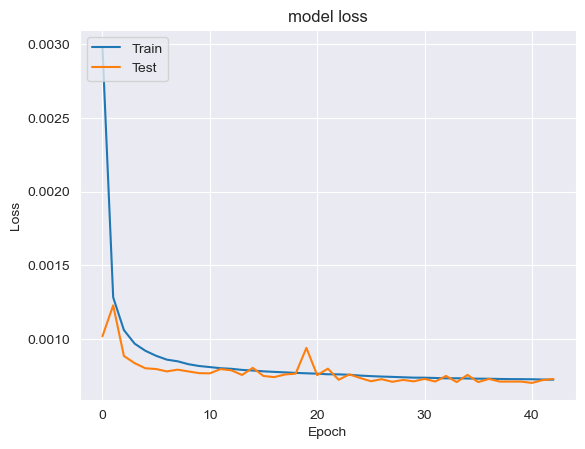

In [85]:
plot_his(history_10)

In [86]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 7.3141e-04 - rmse: 0.0016 - mae: 7.3141e-04 - mse: 2.4995e-06 - mape: 0.7667


[0.0007314111571758986,
 0.0015809896867722273,
 0.0007314111571758986,
 2.4995283638418186e-06,
 0.7666720151901245]

In [87]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [88]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  2360.8638


# Model 11

In [89]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 62s 2ms/step - loss: 0.0037 - rmse: 0.0282 - mae: 0.0037 - mse: 7.9517e-04 - mape: 12.3547 - val_loss: 0.0021 - val_rmse: 0.0031 - val_mae: 0.0021 - val_mse: 9.3682e-06 - val_mape: 1.1728
Epoch 2/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0020 - rmse: 0.0028 - mae: 0.0020 - mse: 7.9661e-06 - mape: 11.9933 - val_loss: 0.0019 - val_rmse: 0.0027 - val_mae: 0.0019 - val_mse: 7.0437e-06 - val_mape: 1.1684
Epoch 3/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.0019 - rmse: 0.0026 - mae: 0.0019 - mse: 6.7457e-06 - mape: 12.8543 - val_loss: 0.0019 - val_rmse: 0.0026 - val_mae: 0.0019 - val_mse: 6.7713e-06 - val_mape: 1.1570
Epoch 4/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.0018 - rmse: 0.0025 - mae: 0.0018 - mse: 6.2340e-06 - mape: 12.4522 - val_loss: 0.0018 - val_rmse: 0.0025 - val_mae: 0.0018 - val_mse: 6.0214e-06 - val_mape: 1.1681
Epoch 5/100


24872/24872 [==============================] - 60s 2ms/step - loss: 0.0015 - rmse: 0.0022 - mae: 0.0015 - mse: 4.7415e-06 - mape: 11.7809 - val_loss: 0.0015 - val_rmse: 0.0022 - val_mae: 0.0015 - val_mse: 4.7247e-06 - val_mape: 1.0483
Epoch 35/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0015 - rmse: 0.0022 - mae: 0.0015 - mse: 4.7278e-06 - mape: 11.7869 - val_loss: 0.0015 - val_rmse: 0.0022 - val_mae: 0.0015 - val_mse: 4.7235e-06 - val_mape: 1.0483
Epoch 36/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0015 - rmse: 0.0022 - mae: 0.0015 - mse: 4.7152e-06 - mape: 11.7405 - val_loss: 0.0015 - val_rmse: 0.0022 - val_mae: 0.0015 - val_mse: 4.6955e-06 - val_mape: 1.0496
Epoch 37/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0015 - rmse: 0.0022 - mae: 0.0015 - mse: 4.7002e-06 - mape: 11.7783 - val_loss: 0.0015 - val_rmse: 0.0022 - val_mae: 0.0015 - val_mse: 4.7122e-06 - val_mape: 1.0440
Epoch 38/100
24872/24

24872/24872 [==============================] - 60s 2ms/step - loss: 0.0014 - rmse: 0.0021 - mae: 0.0014 - mse: 4.4106e-06 - mape: 12.0154 - val_loss: 0.0014 - val_rmse: 0.0021 - val_mae: 0.0014 - val_mse: 4.4247e-06 - val_mape: 1.0438
Epoch 68/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0014 - rmse: 0.0021 - mae: 0.0014 - mse: 4.4028e-06 - mape: 11.9866 - val_loss: 0.0014 - val_rmse: 0.0021 - val_mae: 0.0014 - val_mse: 4.4127e-06 - val_mape: 1.0410
Epoch 69/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0014 - rmse: 0.0021 - mae: 0.0014 - mse: 4.3954e-06 - mape: 11.8991 - val_loss: 0.0014 - val_rmse: 0.0021 - val_mae: 0.0014 - val_mse: 4.4211e-06 - val_mape: 1.0390
Epoch 70/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.0014 - rmse: 0.0021 - mae: 0.0014 - mse: 4.3891e-06 - mape: 11.8870 - val_loss: 0.0014 - val_rmse: 0.0021 - val_mae: 0.0014 - val_mse: 4.4032e-06 - val_mape: 1.0415
Epoch 71/100
24872/24

24872/24872 [==============================] - 58s 2ms/step - loss: 0.0014 - rmse: 0.0021 - mae: 0.0014 - mse: 4.2067e-06 - mape: 12.1572 - val_loss: 0.0014 - val_rmse: 0.0021 - val_mae: 0.0014 - val_mse: 4.2329e-06 - val_mape: 1.0359
CPU times: total: 3h 30min 10s
Wall time: 1h 39min 40s


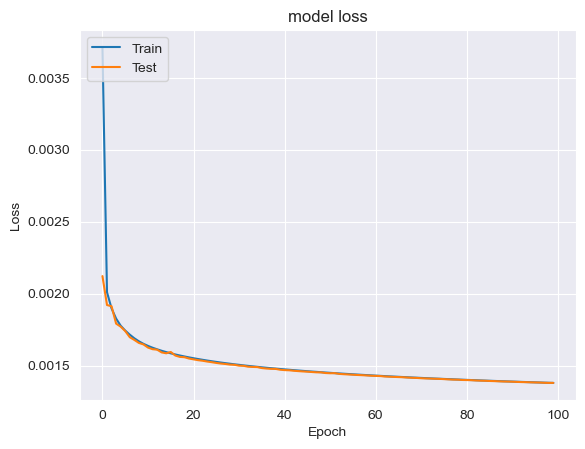

In [90]:
plot_his(history_11)

In [91]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 9s 2ms/step - loss: 0.0014 - rmse: 0.0021 - mae: 0.0014 - mse: 4.2329e-06 - mape: 1.0359


[0.0013801900204271078,
 0.0020573942456394434,
 0.0013801900204271078,
 4.232871106069069e-06,
 1.0359289646148682]

In [92]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [93]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  11712.864


# Model 12

In [94]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0145 - rmse: 0.0248 - mae: 0.0145 - mse: 6.1673e-04 - mape: 24.4505 - val_loss: 0.0128 - val_rmse: 0.0236 - val_mae: 0.0128 - val_mse: 5.5501e-04 - val_mape: 6.2421
Epoch 2/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0130 - rmse: 0.0242 - mae: 0.0130 - mse: 5.8568e-04 - mape: 31.9523 - val_loss: 0.0130 - val_rmse: 0.0249 - val_mae: 0.0130 - val_mse: 6.1835e-04 - val_mape: 7.5492
Epoch 3/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0129 - rmse: 0.0242 - mae: 0.0129 - mse: 5.8657e-04 - mape: 27.2410 - val_loss: 0.0127 - val_rmse: 0.0242 - val_mae: 0.0127 - val_mse: 5.8680e-04 - val_mape: 6.4217
Epoch 4/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0129 - rmse: 0.0242 - mae: 0.0129 - mse: 5.8656e-04 - mape: 28.5104 - val_loss: 0.0133 - val_rmse: 0.0241 - val_mae: 0.0133 - val_mse: 5.8116e-04 - val_mape: 6.7561
Epoch 5/100


24872/24872 [==============================] - 59s 2ms/step - loss: 0.0127 - rmse: 0.0242 - mae: 0.0127 - mse: 5.8727e-04 - mape: 29.4343 - val_loss: 0.0127 - val_rmse: 0.0241 - val_mae: 0.0127 - val_mse: 5.8277e-04 - val_mape: 6.6719
Epoch 35/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0127 - rmse: 0.0242 - mae: 0.0127 - mse: 5.8739e-04 - mape: 29.4998 - val_loss: 0.0127 - val_rmse: 0.0242 - val_mae: 0.0127 - val_mse: 5.8528e-04 - val_mape: 6.6488
Epoch 36/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0127 - rmse: 0.0242 - mae: 0.0127 - mse: 5.8737e-04 - mape: 29.7749 - val_loss: 0.0127 - val_rmse: 0.0241 - val_mae: 0.0127 - val_mse: 5.8034e-04 - val_mape: 6.6719
Epoch 37/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0127 - rmse: 0.0242 - mae: 0.0127 - mse: 5.8733e-04 - mape: 29.3448 - val_loss: 0.0127 - val_rmse: 0.0242 - val_mae: 0.0127 - val_mse: 5.8711e-04 - val_mape: 6.7177
Epoch 38/100
24872/24

24872/24872 [==============================] - 55s 2ms/step - loss: 0.0127 - rmse: 0.0242 - mae: 0.0127 - mse: 5.8758e-04 - mape: 29.3885 - val_loss: 0.0127 - val_rmse: 0.0242 - val_mae: 0.0127 - val_mse: 5.8607e-04 - val_mape: 6.6760
Epoch 68/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0127 - rmse: 0.0242 - mae: 0.0127 - mse: 5.8720e-04 - mape: 29.3228 - val_loss: 0.0127 - val_rmse: 0.0241 - val_mae: 0.0127 - val_mse: 5.8137e-04 - val_mape: 6.5718
Epoch 69/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0127 - rmse: 0.0242 - mae: 0.0127 - mse: 5.8739e-04 - mape: 30.0929 - val_loss: 0.0127 - val_rmse: 0.0241 - val_mae: 0.0127 - val_mse: 5.7927e-04 - val_mape: 6.5548
Epoch 70/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0127 - rmse: 0.0242 - mae: 0.0127 - mse: 5.8723e-04 - mape: 31.0497 - val_loss: 0.0127 - val_rmse: 0.0241 - val_mae: 0.0127 - val_mse: 5.8058e-04 - val_mape: 6.5910
Epoch 71/100
24872/24

24872/24872 [==============================] - 55s 2ms/step - loss: 0.0127 - rmse: 0.0242 - mae: 0.0127 - mse: 5.8712e-04 - mape: 31.1075 - val_loss: 0.0127 - val_rmse: 0.0241 - val_mae: 0.0127 - val_mse: 5.8137e-04 - val_mape: 6.4600
CPU times: total: 2h 54min 4s
Wall time: 1h 34min 53s


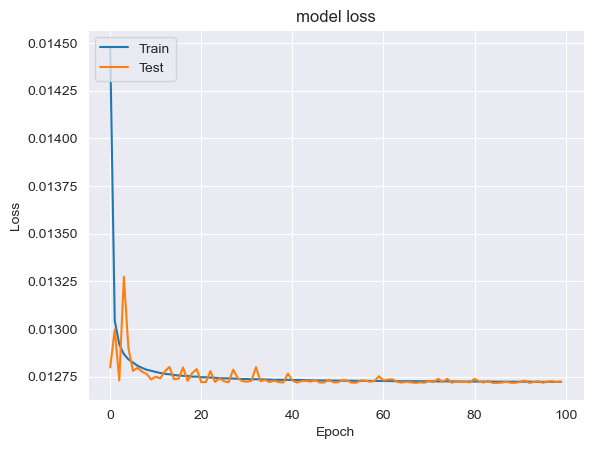

In [95]:
plot_his(history_12)

In [96]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 8s 1ms/step - loss: 0.0127 - rmse: 0.0241 - mae: 0.0127 - mse: 5.8137e-04 - mape: 6.4600


[0.012724306434392929,
 0.02411169558763504,
 0.012724306434392929,
 0.0005813738680444658,
 6.460019111633301]

In [97]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


In [98]:
AIC_value(model_12,prediction_12,Y_test)

AIC:  1556.8643


In [99]:
# AIC_value(model_1,Y_pred_1,Y_test)
# AIC_value(model_2,Y_pred_2,Y_test)
# AIC_value(model_3,Y_pred_3,Y_test)
# AIC_value(model_4,Y_pred_4,Y_test)
# AIC_value(model_5,prediction_5,Y_test)
# AIC_value(model_6,prediction_6,Y_test)
# AIC_value(model_7,prediction_7[:198976],Y_test)
# AIC_value(model_8,prediction_8,Y_test)
# AIC_value(model_9,prediction_9,Y_test)
# AIC_value(model_10,prediction_10,Y_test)
# AIC_value(model_11,prediction_11,Y_test)
# AIC_value(model_12,prediction_12,Y_test)


In [100]:
model_1.save('Nornalized_modals/model_1_Energyesti.h5')

In [101]:
model_2.save('Nornalized_modals/model_2_Energyesti.h5')

In [102]:
model_3.save('Nornalized_modals/model_3_Energyesti.h5')

In [103]:
model_4.save('Nornalized_modals/model_4_Energyesti.h5')

In [104]:
model_5.save('Nornalized_modals/model_5_Energyesti.h5')

In [105]:
model_6.save('Nornalized_modals/model_6_Energyesti.h5')

In [106]:
model_7.save('Nornalized_modals/model_7_Energyesti.h5')

In [107]:
model_8.save('Nornalized_modals/model_8_Energyesti.h5')

In [108]:
model_9.save('Nornalized_modals/model_9_Energyesti.h5')

In [109]:
model_10.save('Nornalized_modals/model_10_Energyesti.h5')

In [110]:
model_11.save('Nornalized_modals/model_11_Energyesti.h5')

In [111]:
model_12.save('Nornalized_modals/model_12_Energyesti.h5')

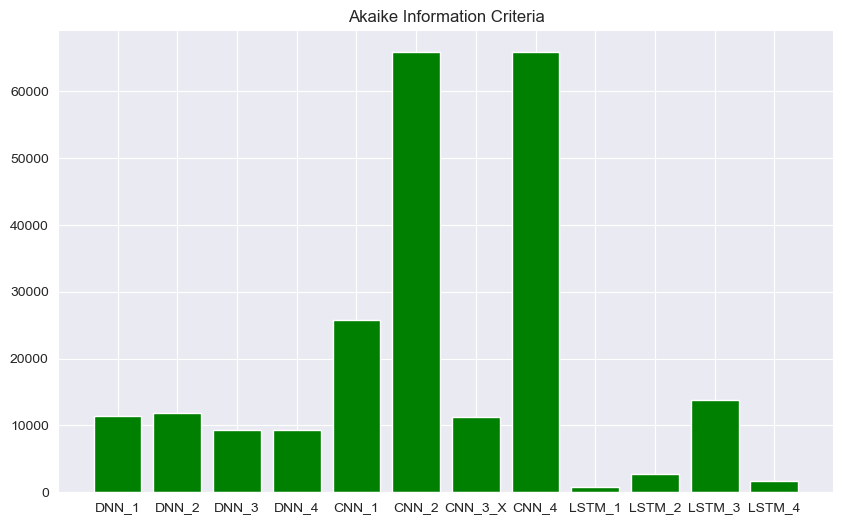

In [112]:
AIC_score = { 'DNN_1':11477.36,'DNN_2':11817.26,'DNN_3':9277.26,'DNN_4':9277.26,'CNN_1':25717.27,
              'CNN_2':65857.26,'CNN_3_X':11217.26,'CNN_4':65857.26,'LSTM_1':777.26,
             'LSTM_2':2777.26, 'LSTM_3':13777.27, 'LSTM_4':1653.38 }
names = list(AIC_score.keys())
values = list(AIC_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(AIC_score)), values, tick_label=names,color='green')

plt.title('Akaike Information Criteria')
plt.show()

In [113]:
df.head()

,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.822158,0.969868,0.554717,0.554717,0.554717,0.558203
1,0.824159,0.969847,0.554823,0.554823,0.554823,0.558283
2,0.826242,0.969850,0.554996,0.554996,0.554996,0.558443
3,0.828049,0.969850,0.555148,0.555148,0.555148,0.558602
4,0.829519,0.969850,0.555320,0.555320,0.555320,0.558762


Text(0.5, 1.0, 'Real Vs Predicted')

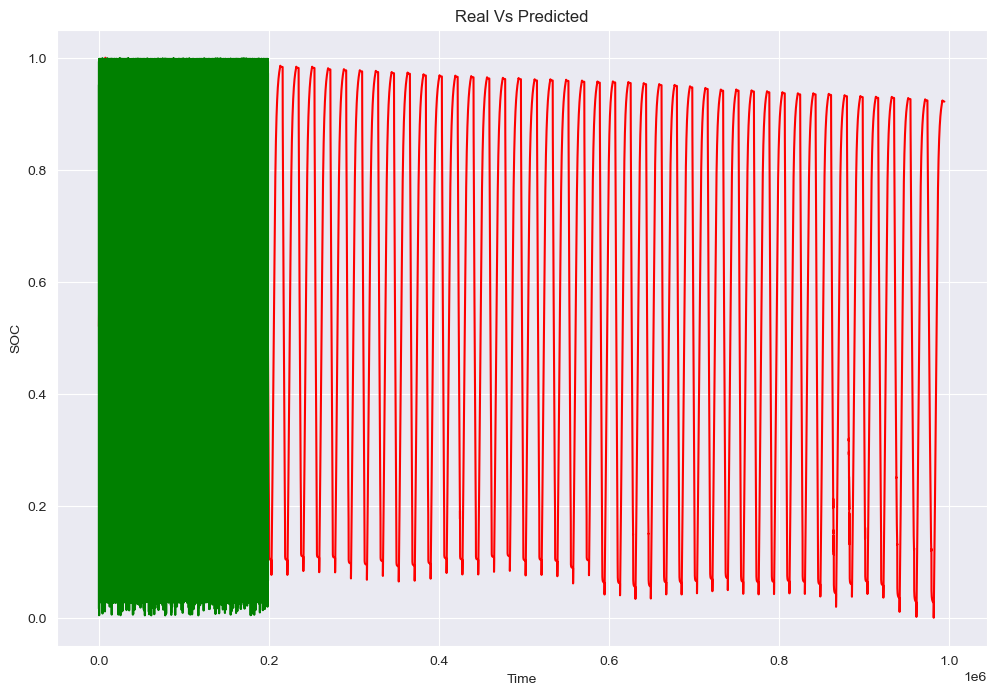

In [114]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(Y,color='r')
plt.plot(Y_pred_2,color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')